# Import Packages

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append("../PycastWorld")
sys.path.append("../Gym")
from gym_pycastworld.PycastWorldEnv import PycastWorldEnv

sys.path.append("../Automator")
from AutoGen import Navigator

from fastai.vision.all import *
from fastbook import *
import datetime;

import sys
import fastprogress
from matplotlib.animation import FuncAnimation

from IPython.display import HTML
# sys.path.append("../PycastWorld")
# from gym_pycastworld.PycastWorldEnv import PycastWorldEnv  # type: ignore

# Initialize environment

In [2]:
env = PycastWorldEnv()

# Grab the initial observation (not used here)
observation = env.reset()

# Random action selection. This should be done in some
# sort of "intelligent" manner.
action = env.action_space.sample()

# Advance the world one step. We could also have the step
# method advance more than step so that it takes fewer
# steps in total to get to the end goal.
# observation, reward, done, info = env.step(action)

# Check if we reached the end goal
# if done:
#     print(f"  Found goal in {t+1} steps")

# print(f"  Ended at position {env.world.getX()}, {env.world.getY()}")
# env.close()

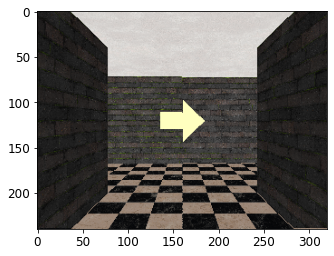

In [15]:
plt.imshow(observation)

In [5]:
from math import pi, acos, asin, cos, sin
from numpy.random import default_rng
rng = default_rng()

def getDir(dirX, dirY):
    """
    :param dirX: the x-coordinate of the direction vector of the camera
    :param dirY: the y-coordinate of the direction vector of the camera
    :rtype: float
    :return: direction the camera is facing (radians)
    """
    # fixing the fact that X,Y coordinates not always within [-1,1]
    if not -1 <= dirX <= 1:
        print("ini")
        dirX = round(dirX)
    if not -1 <= dirY <= 1:
        print("ini")
        dirY = round(dirY)

    if dirX > 0 and dirY >= 0:
        print("acos1")
        return acos(dirX)
    elif dirX <= 0 and dirY >= 0:
        print("acos2")
        return acos(dirX)
    elif dirX < 0 and dirY < 0:
        print("pi-sin")
        return pi - asin(dirY)
    elif dirX >= 0 and dirY < 0:
        print("asin")
        return asin(dirY)

In [5]:
env.world.getDirection()

3.1415926

In [6]:
getDir(env.world.getDirX(), env.world.getDirY())

acos2


3.1415925998628924

In [7]:
env.world.getX(), env.world.getY()

(3.5, 3.5)

In [8]:
import sys
sys.path.append("../MazeGen")
from MazeUtils import read_maze_file, percent_through_maze



(-0.9999999999999986, 5.3589793170057245e-08)

In [9]:
prev_dir = getDir(env.world.getDirX(), env.world.getDirY())

acos2


In [10]:
prev_dir

3.1415925998628924

In [11]:
cos(prev_dir), sin(prev_dir)

(-0.9999999999999986, 5.3726900828617144e-08)

In [108]:
env.world.direction(prev_dir, 1.152)

In [110]:
getDir(env.world.getDirX(), env.world.getDirY())

acos2


3.1415925998628924

In [52]:
def turn_check_perturb(base_dir, targ_dir):
    """
    :param base_dir: the direction (NESW) from the previous step
    :param targ_dir: the target direction (NESW)
    :rtype: string
    :return: 'right' or 'left' depending on where the camera should turn,
    otherwise 'straight' if the camera is facing in the target direction and
    should not turn
    """
    if targ_dir == "Dir.WEST":
        if base_dir == "Dir.NORTH":
                return "left"

        elif base_dir == "Dir.SOUTH":
                return "right"

    elif targ_dir == "Dir.EAST":
        if base_dir == "Dir.NORTH":
                return "right"

        elif base_dir == "Dir.SOUTH":
                return "left"

    elif targ_dir == "Dir.NORTH":
        if base_dir == "Dir.WEST":
                return "right"

        elif base_dir == "Dir.EAST":
                return "left"

    elif targ_dir == "Dir.SOUTH":
        if base_dir == "Dir.WEST":
                return "left"

        elif base_dir == "Dir.EAST":
                return "right"

    return "straight"

In [ ]:
turn_check_perturb(base_dir, targ_dir)

if turn_check_perturb(base_dir, targ_dir) == "left":
    perturb_num = rng.uniform(0, pi / 8)
    new_rad = (perturb_num + prev_dir) % (2 * pi)
    env.world.direction(new_rad, 1.152)
    image_data = np.array(env.world)
    plt.imshow(image_data)
    plt.show()

if turn_check_perturb(base_dir, targ_dir) == "right":
    perturb_num = rng.uniform(-pi / 8, 0)
    new_rad = (perturb_num + prev_dir) % (2 * pi)
    env.world.direction(new_rad, 1.152)
    image_data = np.array(env.world)
    plt.imshow(image_data)
    plt.show()

pi-sin


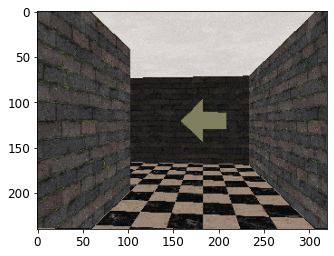

In [44]:
env.world.position(5.5, 17.5, 0)
env.world.direction(3*pi/2, 1.152)
prev_dir = getDir(env.world.getDirX(), env.world.getDirY())
perturb_num = rng.uniform(0, pi/8)
new_rad = (perturb_num + prev_dir) % (2 * pi)
env.world.direction(new_rad, 1.152)
image_data = np.array(env.world)
plt.imshow(image_data)
plt.show()

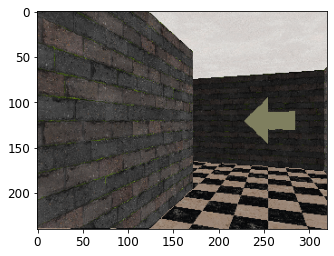

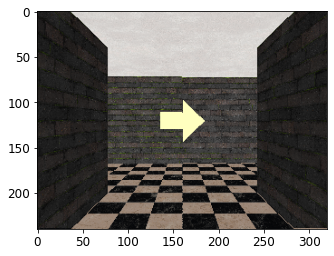

In [44]:
env.world.direction(prev_dir, 1.152)
image_data = np.array(env.world)
plt.imshow(image_data)
plt.show()

In [45]:
getDir(env.world.getDirX(), env.world.getDirY())

3.1415925998628924

In [46]:
env.world.getDirX(), env.world.getDirY()

(-0.9999999999999986, 5.3726900828617144e-08)

## Set Position

-1.0 1.2246467991473532e-16


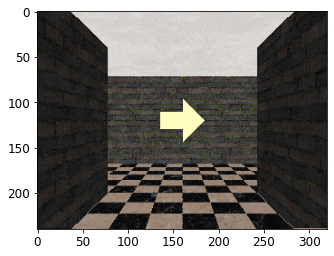

In [59]:
env.reset()
env.world.position(3.5, 3.5, 0)
env.world.direction(pi, 1.152)
print(env.world.getDirX(), env.world.getDirY())
observation = env.render(mode='rgb_array')
plt.imshow(observation)

(-1.0, -1.0)

## Moving

### Turn Left

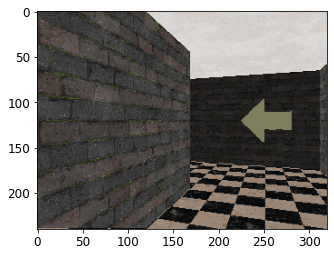

In [19]:
observation, reward, done, info = env.step(0)
plt.imshow(observation)

### Move Forward

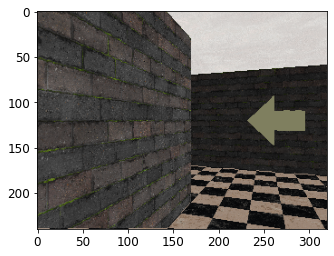

In [24]:
observation, reward, done, info = env.step(1)
plt.imshow(observation)

### Turn Right

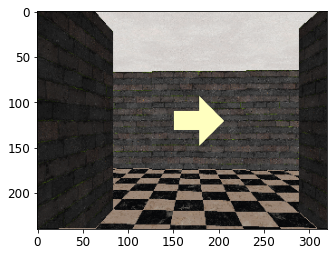

In [63]:
observation, reward, done, info = env.step(2)
plt.imshow(observation)

## Reset Environment

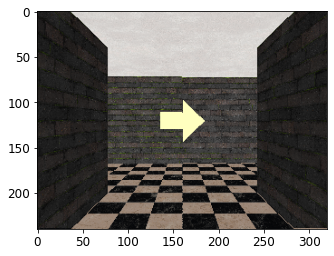

In [112]:
observation = env.reset()
plt.imshow(observation)

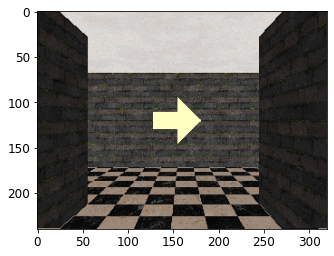

In [39]:
env.world.direction(3.14, 1.152)
observation, reward, done, info = env.step(1)
plt.imshow(observation)

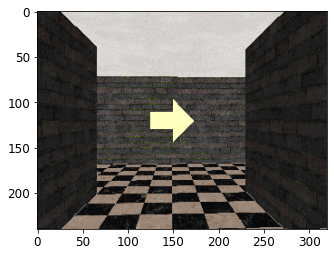

In [18]:
observation, reward, done, info = env.step(2)
plt.imshow(observation)

### Print Position

  Ended at position 3.5, 3.5


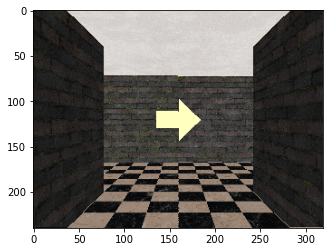

In [20]:
plt.imshow(observation)
print(f"  Ended at position {env.world.getX()}, {env.world.getY()}")

## List environment methods

In [39]:
dir(env.world);

# Collecting Data

Below is a code chunk that utilize the AutoGen.py, a program written by Jared, which automatically runs the game and saves the camera's images into three directories: left, right, and straight. 

- Do we care if the images are downloaded in sequential order?
- While running the AutoGen.py the robot gets stuck. That is, the program is running forever at a particular step in the directions. 
- maze.txt AutoGen run
	- looks like it gets stuck in last step? 
	- saved 5202 in straight, 318 in left, and 384 in right images on first run
	- AutoGen finished running after second run
		- 816 in straight, 155 in left, 228 in right
- new_maze.txt Autogen
    - finished running and added 585 images to straight, 101 to left, and 38 in right (i think that makes sense acutally because new_maze only had one WEST direction)??
- new_maze2.txt 
    - Looks like the robot gets stuck more easily. Maybe there's a way to graphically show this. Might need to adjust AutoGen ranomization
    
- new dataset build over weekend: 
    - saved about 4157 in straight, which has the most compared to left and right

In [3]:
# maze = sys.argv[1] if len(sys.argv) > 1 else "../Worlds/maze.txt"
# img_dir = sys.argv[2] if len(sys.argv) > 2 else None
maze = "../Worlds/maze.txt"
img_dir = "../Notebooks/data"
show_freq = 0

navigator = Navigator(maze, img_dir)

j = 0
while j < navigator.num_directions - 1:
    navigator.navigate(j, show_dir=True, show_freq=show_freq)
    j += 1
print(j)

Directions: 1, 3, Dir.NORTH
Directions: 1, 5, Dir.NORTH
Directions: 1, 7, Dir.NORTH
Directions: 1, 9, Dir.EAST
Directions: 3, 9, Dir.NORTH
Directions: 3, 11, Dir.NORTH


KeyboardInterrupt: 

In [4]:
dir_types = 'left','right','straight'
path = Path('../Notebooks/data')

## Size of trained dataset on 10 mazes: 

In [6]:
!ls -l ../Notebooks/data/left | wc -l

3461


In [7]:
!ls -l ../Notebooks/data/right | wc -l

3511


In [8]:
!ls -l ../Notebooks/data/straight | wc -l

12612


In [5]:
if not path.exists():
    path.mkdir()
    for o in dir_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} data')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [6]:
path.ls()

(#4) [Path('../Notebooks/data/left'),Path('../Notebooks/data/.ipynb_checkpoints'),Path('../Notebooks/data/right'),Path('../Notebooks/data/straight')]

In [7]:
lefts = (path/'left').ls().sorted()
rights = (path/'right').ls().sorted()
straights = (path/'straight').ls().sorted()

# Model Building

In [8]:
# dls = ImageDataLoaders.from_folder(path) # expects train and validate folder 

# should work with cur dir hierarchy
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, seed=42, item_tfms=Resize(128)) 

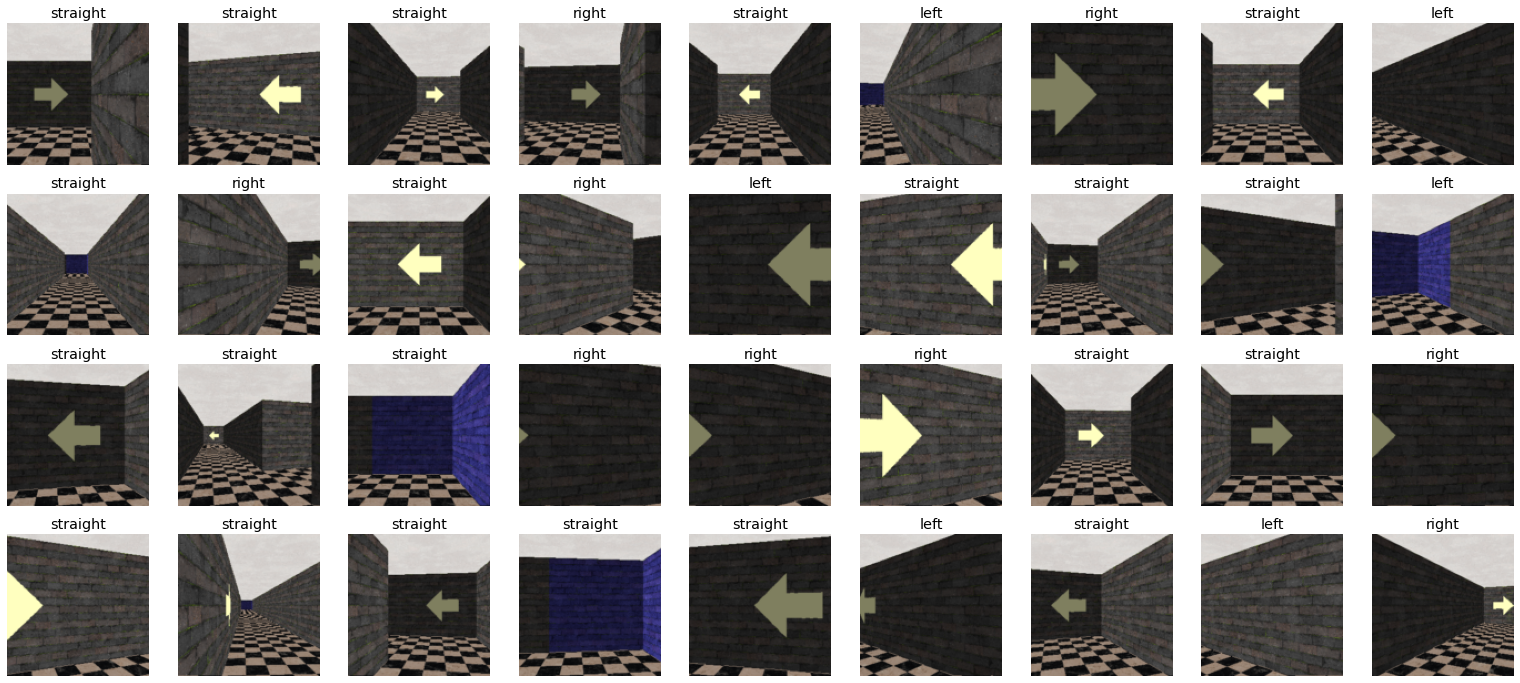

In [9]:
dls.valid.show_batch(max_n=36, nrows=4)

In [19]:
dls.train_ds.loss_func

FlattenedLoss of CrossEntropyLoss()

## Model trained on 15 mazes

In [10]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.608941,0.445049,0.135047,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.333630,0.293007,0.099766,00:23


## Model Diagnostics

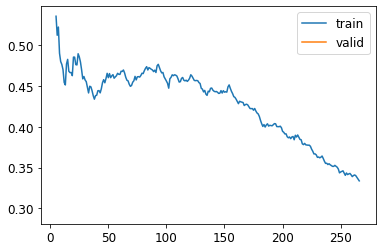

In [11]:
learn.recorder.plot_loss()

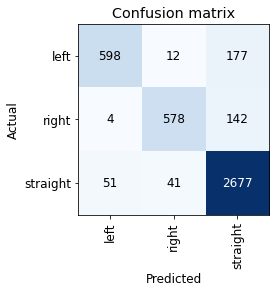

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix() # tell fastai we have an inbalance in our training set: loss weighting
# learn.shape

In [36]:
interp.plot_top_losses(9) # look into deleting scurious images

NameError: name 'interp' is not defined

In [40]:
learn.model;

In [46]:
'''
look at [1][8]. this is 3 neurons that represent our 3 classes. 
take that output of [1][8]
and concatenate it with another linear

might want to plug in new neuron in flatten and concatenate 

make the very first additional data straight
'''
learn.model[1][8];

## Export the Model

In [94]:
learn.export(fname="learner_" + str(datetime.datetime.now()) + ".pkl")

In [7]:
path = Path('../Models')
path.ls(file_exts='.pkl')

(#15) [Path('../Models/auto-stack-c-large.pkl'),Path('../Models/auto-gen-c_large-6-6.pkl'),Path('../Models/learner_2021-06-01 16:40:23.194027.pkl'),Path('../Models/auto-stack-r3.pkl'),Path('../Models/auto-gen-r_plus.pkl'),Path('../Models/weighted_model.pkl'),Path('../Models/auto-gen-c.pkl'),Path('../Models/auto-gen-r_large-6-6.pkl'),Path('../Models/auto-gen-c_plus.pkl'),Path('../Models/auto-stack-r.pkl')...]

## Apply Model

In [16]:
steps_per_episode = 1500

env = PycastWorldEnv()

# Run some number of trials all starting from the
# initial location. We might eventually randomize
# the maze and the starting location.

# Grab the initial observation (not used here)
observation = env.reset()
frames = [observation.copy()]
model_inf = load_learner(path/'auto-gen-c_large-6-6.pkl')

In [17]:
%%capture
start = time.time()
print("Predicting...")
# learn.recorder.silent = True
for t in range(steps_per_episode):    
    # Use a trained CNN to select the action
    action_name, action_index, action_probs =  model_inf.predict(observation);    
    # map 2 to 1
    if action_index == 2:
        action_index = 1
    elif action_index == 1:
        action_index = 2

    # Advance the world one step. We could also have the step
    # method advance more than step so that it takes fewer
    # steps in total to get to the end goal.
    observation, reward, done, info = env.step(action_index)
    frames.append(observation.copy())

    # Check if we reached the end goal
    if done:
        print(f"  Found goal in {t+1} steps")
        break

print(f"  Ended at position {env.world.getX()}, {env.world.getY()}")
env.close();
end = time.time()
print ("Time elapsed:", end - start)

# Animate frames

## Save Animation as a GIF

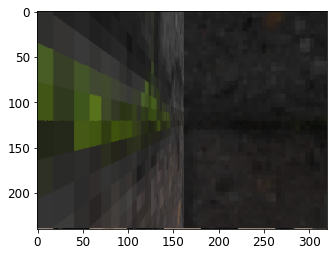

In [26]:
fig, ax = plt.subplots()
ln = plt.imshow(frames[0])
def init():
    ln.set_data(frames[0])
    return [ln]

def update(frame):
#     print(frame)
    ln.set_array(frame)
    return [ln]

ani = FuncAnimation(fig, update, frames, init_func=init, interval=60)
# plt.show()
ani.save("prediction_" + str(datetime.datetime.now()) + ".mp4")

In [13]:
env.world.

NameError: name 'world' is not defined

## View Animation in HTML Representation

In [25]:
smaller_frames = frames[::45] 
ani = FuncAnimation(fig, update, smaller_frames, init_func=init, interval=100)
ani.save('test.mp4') #ani.to_html5